# Deep Learning : Perceptron Neuron Model

## 1. Importing Required Libraries

In [1]:
import numpy as np              # for mathematical computation
import pandas as pd             # for data handiling
import matplotlib.pyplot as plt # for data visualization
from random import randint      # for generating random numbers
import sklearn.datasets         # to import the breast_cancer dataset
from sklearn.model_selection import train_test_split  # splits the data in two(train and test) parts automatically
from sklearn.metrics import accuracy_score            # for calculating the accuracy

## 2. Loading DataSet

In [2]:
#load the data into a variable and convert it to a dataframe using pandas DataFrame lib.
#we do it because the data whne loaded in in raw form which is hard to visualiza and manipulate
breast_cancer = sklearn.datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['class'] = breast_cancer.target
data.head()   # shows the first 5 rows of the data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Describe the data in general
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [4]:
# what are the actual counts of each of the categories in data.
data['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [5]:
# what are the actual name of the categories we want to predict.
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

## 3. Train test split

In [6]:
# first drop the class col and assign the remaining data to X variable which is input to the model.
# we drop the class col because it the ouput and is assigned to Y variable.
X = data.drop('class', axis=1)
Y = data['class']

In [7]:
# look at the type of X & Y
print("type of X:",type(X))
print("type of Y:",type(Y))

type of X: <class 'pandas.core.frame.DataFrame'>
type of Y: <class 'pandas.core.series.Series'>


In [8]:
# prints the size (row,col) of the input and output
print(X.shape, Y.shape)

(569, 30) (569,)


In [9]:
# we can't just train the model on whole dataset, it will be meaningless we don't have some data for it's validation.
#Though our model will get higher accuray in training but when testin on unkown data we might get a very loss accuracy.
# So,the data must be split into training part and testing part 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state=1)
X_train = X_train.values
X_test = X_test.values

## 5. Perceptron neuron model

$y = 1, \mbox{if} \sum_i w_i x_i >= b$

$y =  0, \mbox{otherwise}$

In [10]:
# this is actual the Perceptron mode defined using class in python
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    
    accuracy = {}
    max_accuracy = 0
    
    wt_matrix = []
    
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
          
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
        
    self.w = chkptw
    self.b = chkptb
        
    print(str(max_accuracy * 100) + " %")
    
    plt.plot(list(accuracy.values()))
    plt.ylim([0, 1])
    plt.show()
    
    return np.array(wt_matrix)

93.5546875 %


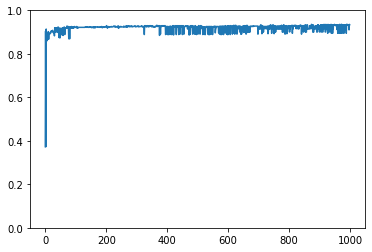

array([[ 2.24435000e+02,  4.17945000e+02,  1.35838500e+03, ...,
         4.60700000e-01,  7.51435000e+00,  2.96719500e+00],
       [ 3.60757000e+02,  6.40635000e+02,  2.17530500e+03, ...,
        -1.76185000e-01,  1.12220000e+01,  4.04884000e+00],
       [ 4.41086000e+02,  7.64400000e+02,  2.63701500e+03, ...,
        -1.02939000e+00,  1.28346500e+01,  4.54517500e+00],
       ...,
       [ 9.59886150e+03,  1.45964000e+03,  2.86337650e+04, ...,
        -1.06390379e+03, -7.32537400e+02, -2.57070185e+02],
       [ 9.60364650e+03,  1.46272500e+03,  2.86350450e+04, ...,
        -1.06492724e+03, -7.33359200e+02, -2.57316910e+02],
       [ 9.61339150e+03,  1.47404000e+03,  2.86657200e+04, ...,
        -1.06592894e+03, -7.33865250e+02, -2.57536430e+02]])

In [11]:
# we define the model to a variable so that we can create n such model from a single class
model = Perceptron() # model defined
model.fit(X_train, Y_train, 1000, 0.5) # train the model on train data

In [12]:
# Now the model is trained and very are ready to predict 
Y_test_pred = model.predict(X_test) # predict the optput for test data and store in Y_pred
accuracy_test = accuracy_score(Y_test_pred, Y_test) # calculate the accuracy

In [13]:
print(str(accuracy_test*100)+" %") # print the accuracy

91.22807017543859 %
